In [1]:
import pandas as pd
import pickle
import random
import numpy as np
import os
import torch
import models 

/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## test train mle

In [2]:
import argparse
import json
import os

import numpy as np
import torch

import trainUtils

In [3]:
path = "/data2/tyfei/trainresults/ionChannels/ESMCActiveLearning/newtest/0_test7/"
with open(os.path.join(path, "config.json"), "r") as f:
    configs = json.load(f)

In [4]:
pretrain_model = trainUtils.loadPretrainModel(configs)
model = trainUtils.buildModel(configs, pretrain_model)
ds = trainUtils.loadDataset(configs)

initized model for active_learning stage
fix model for active learning


In [5]:
for i, j in model.named_parameters():
    if j.requires_grad:
        print(i, j)

clf.l1.weight Parameter containing:
tensor([[ 4.7598e-03,  2.7982e-04,  2.3509e-04,  ...,  9.4208e-04,
         -8.4217e-03, -3.2199e-04],
        [-6.7978e-05,  6.4566e-05, -1.7740e-04,  ..., -7.2887e-05,
         -1.9631e-04, -1.0491e-04],
        [-1.5523e-04,  4.0233e-04,  1.1416e-04,  ...,  7.5458e-05,
         -9.3520e-05,  3.8248e-04],
        ...,
        [-5.3433e-05, -7.5677e-05,  6.6843e-05,  ...,  1.2642e-04,
         -1.9088e-04,  5.5274e-04],
        [ 9.8540e-06,  1.0747e-04,  3.4970e-04,  ...,  6.1645e-05,
          2.0251e-05,  1.6988e-06],
        [-2.2824e-03,  5.7999e-03, -4.2507e-03,  ...,  4.6479e-03,
          9.7588e-04,  6.5786e-03]], requires_grad=True)
clf.l1.bias Parameter containing:
tensor([ 2.7059e-02, -4.9259e-03,  2.7718e-03,  2.0553e-02, -2.1533e-03,
         7.9627e-04,  8.5251e-03,  2.4621e-02,  1.8997e-02, -1.3601e-03,
         1.6795e-02, -5.0541e-03, -3.2794e-03, -3.4163e-04, -3.4138e-03,
         3.1380e-03,  1.8376e-03,  5.2309e-03,  3.4471e-04,

In [6]:
dl = ds.train_dataloader() 
for b, data in enumerate(dl):
    # print(x.shape, y.shape)
    break
data = data[3]

get train loader
called new epoch


In [11]:
embeds = [] 
with torch.no_grad():
    for i in data:
        embeds.append(model.getEmbedding(i)[0, 0])
embeds = torch.stack(embeds, dim=0)

In [12]:
clsmodel = models.Linearcls(1152, dropout=0.2, p0=0.2, take_embed="mean")

In [7]:
clsmodel = clsmodel.to(2)
embeds = embeds.to(2)
cri = models.ListMLE()
# clsmodel.eval()
# for i in data:
#     i["seq_t"] = i["seq_t"].to(2)
q = torch.optim.Adam(filter(lambda x: x.requires_grad, clsmodel.parameters()), lr=0.0001)
for i in range(1000):
    q.zero_grad()
    loss = cri(clsmodel(embeds).squeeze(1))
    # loss = clsmodel._list_training_step(data)
    print(loss)
    # loss = loss * 0.0
    loss.backward()
    q.step()
    print(loss.item())
    # print(model(data).item())
    # print("")
    

tensor(4, device='cuda:2') tensor(-0.0921, device='cuda:2', grad_fn=<SqueezeBackward0>)
tensor(295.0769, device='cuda:2', grad_fn=<SumBackward0>)
295.0769348144531
tensor(4, device='cuda:2') tensor(-0.0926, device='cuda:2', grad_fn=<SqueezeBackward0>)
tensor(295.0636, device='cuda:2', grad_fn=<SumBackward0>)
295.0635681152344
tensor(4, device='cuda:2') tensor(-0.0930, device='cuda:2', grad_fn=<SqueezeBackward0>)
tensor(295.0497, device='cuda:2', grad_fn=<SumBackward0>)
295.04974365234375
tensor(4, device='cuda:2') tensor(-0.0931, device='cuda:2', grad_fn=<SqueezeBackward0>)
tensor(295.0352, device='cuda:2', grad_fn=<SumBackward0>)
295.0352478027344
tensor(4, device='cuda:2') tensor(-0.0929, device='cuda:2', grad_fn=<SqueezeBackward0>)
tensor(295.0199, device='cuda:2', grad_fn=<SumBackward0>)
295.0198974609375
tensor(4, device='cuda:2') tensor(-0.0926, device='cuda:2', grad_fn=<SqueezeBackward0>)
tensor(295.0037, device='cuda:2', grad_fn=<SumBackward0>)
295.00372314453125
tensor(4, devi

KeyboardInterrupt: 

In [23]:
for i, j in model.named_parameters():
    if j.requires_grad:
        print(i, j)

clf.l1.weight Parameter containing:
tensor([[ 5.6183e-03, -7.2583e-04,  9.2370e-04,  ...,  2.3575e-03,
         -6.6478e-03, -2.2759e-03],
        [-4.2368e-03,  3.8491e-03, -3.8733e-03,  ..., -3.8524e-03,
         -4.0215e-03,  3.9197e-03],
        [ 1.6638e-03,  8.2855e-04,  1.1220e-03,  ..., -5.4048e-04,
         -3.3162e-05, -1.0610e-03],
        ...,
        [-4.1821e-03,  2.9903e-03, -2.4395e-03,  ..., -1.5212e-03,
         -2.8255e-03,  3.6214e-03],
        [ 1.8198e-03, -1.1366e-03,  1.9718e-03,  ...,  9.9019e-05,
          7.1877e-04, -1.6034e-03],
        [-1.1829e-03,  5.6399e-03, -4.5914e-03,  ...,  3.6545e-03,
         -1.4379e-04,  5.3215e-03]], device='cuda:2', requires_grad=True)
clf.l1.bias Parameter containing:
tensor([ 2.9316e-02, -6.9022e-03, -6.3497e-04,  2.0163e-02,  1.9693e-03,
         4.1604e-03,  7.1277e-03,  2.1045e-02,  1.6818e-02,  1.6161e-03,
         1.4598e-02, -1.0070e-02, -5.4684e-04, -4.7448e-03, -1.8326e-03,
         6.9637e-03,  6.9514e-03,  2.1132e

## test MLE

In [8]:
import torch.nn as nn
def listMLE(y_pred, y_true, eps=1e-8, padded_value_indicator=0):
    """
    ListMLE loss introduced in "Listwise Approach to Learning to Rank - Theory and Algorithm".
    :param y_pred: predictions from the model, shape [batch_size, slate_length]
    :param y_true: ground truth labels, shape [batch_size, slate_length]
    :param eps: epsilon value, used for numerical stability
    :param padded_value_indicator: an indicator of the y_true index containing a padded item, e.g. -1
    :return: loss value, a torch.Tensor
    """
    # shuffle for randomised tie resolution
    random_indices = torch.randperm(y_pred.shape[-1])
    y_pred_shuffled = y_pred[:, random_indices]
    y_true_shuffled = y_true[:, random_indices]

    y_true_sorted, indices = y_true_shuffled.sort(descending=True, dim=-1)

    mask = y_true_sorted == padded_value_indicator

    preds_sorted_by_true = torch.gather(y_pred_shuffled, dim=1, index=indices)
    preds_sorted_by_true[mask] = float("-inf")

    max_pred_values, _ = preds_sorted_by_true.max(dim=1, keepdim=True)

    preds_sorted_by_true_minus_max = preds_sorted_by_true - max_pred_values

    cumsums = torch.cumsum(preds_sorted_by_true_minus_max.exp().flip(dims=[1]), dim=1).flip(dims=[1])

    observation_loss = torch.log(cumsums + eps) - preds_sorted_by_true_minus_max

    observation_loss[mask] = 0.0

    return torch.mean(torch.sum(observation_loss, dim=1))

In [9]:
class NN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        # out = self.softmax(out)
        return out
model = NN(256, 50, 1)

In [15]:
model = models.Linearcls(256, p0=0.2, dropout=0.2)

In [35]:
a = torch.tensor([0.5, 0.4, 0.3, 0.2, 0.1]).unsqueeze(0)
b = torch.tensor([0.1, 0.2, 0.3, 0.4, 0.5]).unsqueeze(0)
listMLE(a, a)

tensor(4.3083)

In [11]:
a = torch.randn(85, 20, 256) 
b = torch.tensor(range(85)).float().unsqueeze(0)

In [12]:
cri = models.ListMLE()

In [32]:
t = torch.tensor([ 3.5803e-04,  2.1979e-03,  3.8311e-04,  5.2792e-04,  4.8840e-04,
         1.0956e-03,  4.0375e-04,  2.1282e-03, -1.0719e-03,  2.1690e-03,
         3.5637e-04,  7.8660e-04, -1.7349e-04,  1.1136e-03,  1.4135e-03,
        -5.7234e-05, -1.9069e-04,  1.5373e-03, -1.5336e-04,  5.0368e-04,
         1.0354e-03,  9.4463e-04,  1.5163e-03,  1.9483e-03,  6.8653e-04,
         1.1449e-03,  1.4879e-04,  3.3806e-04,  1.5077e-03,  9.2047e-04,
         2.3447e-03,  2.2386e-03,  1.4788e-03,  1.7258e-03, -2.6664e-04,
        -1.5059e-04,  6.0289e-04, -6.1682e-04,  7.1805e-04,  1.0268e-03,
         2.7502e-03, -7.3034e-04, -8.2444e-05, -7.1462e-04,  1.1572e-03,
         7.2149e-04,  6.2846e-04,  1.6673e-03,  1.2135e-03,  1.4576e-03,
         1.4565e-03,  1.9022e-03, -4.4323e-04,  8.4509e-04,  8.5283e-04,
         3.7751e-04,  1.6441e-03,  7.9547e-04, -1.8599e-04,  2.2232e-04,
         9.0810e-04,  1.7102e-03,  5.1223e-04,  7.4762e-05, -5.0921e-04,
         2.4580e-03,  1.3834e-03,  1.8816e-04,  1.7089e-03,  1.1783e-03,
         1.0902e-03,  9.6748e-06,  7.7385e-04,  2.1562e-03,  8.9369e-04,
         1.0644e-03,  4.2991e-05,  1.5249e-03,  2.2387e-03, -1.2712e-03,
         3.6258e-04, -3.7134e-04,  2.8287e-04,  2.0146e-03,  2.1470e-03])
listMLE(t.unsqueeze(0), torch.tensor(range(len(t))).unsqueeze(0)), cri(t)

(tensor(291.3251), tensor(295.7650))

In [44]:
cri(model(a).squeeze(1))

tensor(298.6251, grad_fn=<SumBackward0>)

In [13]:
q = torch.optim.Adam(model.parameters(), lr=0.001)
for i in range(10000):
    q.zero_grad()
    loss = cri(model(a).squeeze(1))
    # loss = listMLE(model(a).T, b)
    loss.backward()
    q.step()
    if i % 10 == 0:
        print(loss.item())

295.49237060546875
275.42333984375
241.91757202148438
204.74676513671875
191.94525146484375
182.60096740722656
167.7770538330078
175.0205841064453
163.2277069091797
177.66397094726562
150.88702392578125
172.1427764892578
155.294677734375
151.4325408935547
163.6064453125
142.91651916503906
166.66835021972656
137.78041076660156
149.24563598632812
132.16134643554688
148.91616821289062
149.13629150390625
142.8118896484375
131.6849822998047
151.8173828125
141.29368591308594
131.7283172607422
153.69264221191406
140.82652282714844
147.15045166015625
128.57325744628906
147.77639770507812
139.59857177734375
143.10546875
133.0745849609375
132.4609832763672
145.72999572753906
151.0432891845703
142.7871551513672
134.4236297607422
161.66993713378906
158.68896484375
129.1192626953125
142.7677459716797
138.77366638183594
150.19432067871094
133.1096954345703
148.2271728515625
141.4473114013672
142.9604034423828
136.13873291015625
139.6472625732422
134.7795867919922
144.79043579101562
140.1946105957031

In [14]:
model(a)

tensor([[-2.3798e+02],
        [-2.4609e+02],
        [-2.1981e+02],
        [-1.6382e+02],
        [-1.5919e+02],
        [-1.6381e+02],
        [-1.6579e+02],
        [-1.3379e+02],
        [-1.3725e+02],
        [-1.2384e+02],
        [-1.0684e+02],
        [-1.1047e+02],
        [-1.0213e+02],
        [-1.0535e+02],
        [-1.1044e+02],
        [-1.0032e+02],
        [-7.3577e+01],
        [-8.4864e+01],
        [-8.2507e+01],
        [-6.1382e+01],
        [-6.3275e+01],
        [-7.0639e+01],
        [-4.8080e+01],
        [-8.1123e+01],
        [-4.8971e+01],
        [-5.3162e+01],
        [-4.6056e+01],
        [-3.8653e+01],
        [-3.3820e+01],
        [-3.5937e+00],
        [-3.2592e+01],
        [-2.8362e+01],
        [-2.1326e+01],
        [-2.1170e+01],
        [-1.3926e+01],
        [-1.6375e+01],
        [-1.6533e+00],
        [-3.9321e+00],
        [-2.9408e-01],
        [-1.5114e+01],
        [ 2.0434e+00],
        [ 3.7254e+00],
        [ 3.3746e+01],
        [ 1

In [13]:
a = models.ListMLE() 

In [15]:
a(b.squeeze(0))

tensor(4.3083)

## 建立885名称索引

In [1]:
df = pd.read_excel("./temp/1204平均排序.xlsx", sheet_name="Sheet1", index_col=0)
df = df[~pd.isnull(df["质粒的名称"])]
df.head()

NameError: name 'pd' is not defined

In [16]:
len(df)

873

In [19]:
df = df[["所有序列", "蛋白质序列", "质粒的名称"]]
df["name2"] = df["质粒的名称"].apply(lambda x: x[:3]+"H-"+x[3:])
df.to_csv("./temp/all885.csv")
df.head()

,所有序列,蛋白质序列,质粒的名称,name2
num,,,,
0,MKPLCTPWVDGTILCSLLFLLAFSGVSSAWSNDTKLPQRRSGHLRD...,GSMKPLCTPWVDGTILCSLLFLLAFSGVSSAWSNDTKLPQRRSGHL...,VIL1,VILH-1
1,MLRYPWLQLLATFLLFEVSLCCFFSKKGLTTSYNRRFHYRWIQLNR...,GSMLRYPWLQLLATFLLFEVSLCCFFSKKGLTTSYNRRFHYRWIQL...,VIL2,VILH-2
2,MGRQDTSREGNEDYEDIMRWVRRFVWLTRVYTVLAVQMAVTLAFCL...,GSMGRQDTSREGNEDYEDIMRWVRRFVWLTRVYTVLAVQMAVTLAF...,VIL3,VILH-3
3,MEVLRFQVRFTESIIWIQRFKILIQLYSYWLLQVTVTSTLSTLMWL...,GSMEVLRFQVRFTESIIWIQRFKILIQLYSYWLLQVTVTSTLSTLM...,VIL4,VILH-4
4,MDHRSYADAELAESWMHENLVQWIDRFRSVVAIYSNALFEVAGTLS...,GSMDHRSYADAELAESWMHENLVQWIDRFRSVVAIYSNALFEVAGT...,VIL5,VILH-5


In [10]:
dfexp = pd.read_excel("./temp/1210_对应信息.xlsx", sheet_name="Sheet1")
# dfexp["new"] = dfexp["蛋白质序列.1"].map(df["new"])
dfexp2 = pd.read_excel("./temp/1210_对应信息.xlsx", sheet_name="Sheet2")
dfexp2["rank"] = range(len(dfexp2))
dfexp2["rank"] = -dfexp2["rank"]
dfexp["rank"] = dfexp["质粒的名称"].map(dfexp2.set_index("Name")["rank"])
dfexp = dfexp.sort_values("rank")
dfexp.head()

,质粒的名称,蛋白质序列,蛋白质序列.1,rank
0,VILH-301,GSMPPQRARGAPPRRRGSDPPDPGSLAGRLSPGGRSGGGSRRTLSR...,MPPQRARGAPPRRRGSDPPDPGSLAGRLSPGGRSGGGSRRTLSRSS...,NaN
1,VILH-197,GSMRASKSDRFLMSSWVKLLFVAVIMYICSAVVPMAATYEGLGFPC...,MRASKSDRFLMSSWVKLLFVAVIMYICSAVVPMAATYEGLGFPCYF...,NaN
2,VILH-19,GSMAPSKVDSVNSRIWGISVFLAFLTFANICGHTTMMNVPGVGYPC...,MAPSKVDSVNSRIWGISVFLAFLTFANICGHTTMMNVPGVGYPCSY...,NaN
3,VILH-363,GSMDAVSALCVALASAAAMFVALQMWAVYENYDNIREFNSANAALE...,MDAVSALCVALASAAAMFVALQMWAVYENYDNIREFNSANAALEFA...,NaN
4,VILH-426,GSMDKTTLSVNACNLEYVREKAIVGVQAAKTSTLIFFVIILAISAL...,MDKTTLSVNACNLEYVREKAIVGVQAAKTSTLIFFVIILAISALLL...,NaN


In [6]:
with open("/data/tyfei/datasets/ion_channel/Interprot/test885.pkl", "rb") as f:
    data = pickle.load(f)
# data[0]

In [3]:
with open("/data/tyfei/datasets/ion_channel/Interprot/activeLearningTest/0/test.pkl", "rb") as f:
    data = pickle.load(f) 
data[-1]["ori_seq"], data[0]["ori_seq"]

('MGCDVHDPSWQCQWGVPTIIVAWITCAALGIWCLAGSSADVSSGPGIAAVVGCSVFMIFLCAYLIRYREFFKDSVIDLLTCRWVRYCSCSCKCSCKCISGPCSRCCSACYKETMIYDMVQYGHRRRPGHGDDPDRVICEIVESPPVSAPTVFVPPPSEESHQPVIPPQPPTPTSEPKPKKGRAKDKPKGRPKNKPPCEPTVSSQPPSQPTAMPGGPPDASPPAMPQMPPGVAEAVQAAVQAAMAAALQQQQQHQTGT',
 'MISQGNGGGCRPGEPCWRCALESTRCITLMGVLVALLAACMLSVPPAASTMLLGVASLMAMLRLPMPLVDRFIPACMGLQLVGAAVFAAGWALASRDAISAGVLLWAVCALISHMYNVVCVASGPDAHYRPACLVMGVAAACGAAGALVNVRTEARLGIALGLAVTCATNNVARSLRGTCTYVASRARFLAAPADLGRGYSVENADADPTAEPERRVYEATVPHTHAYAGSIALFALVFSAASSLQWMVSQMVGRGNQLVSPTTAAAAGAAGFLDAAAVSLFVRPSTRHLSVAVKGAHTLLILAAIVLTAAGEPMGVPISLAASTGLGAARGGPRPLRHTRAYRLAAAHVTRALLVQAYVTVAMCATSIKSVS')

In [31]:
with open("/data/tyfei/datasets/ion_channel/Interprot/activeLearningTest/0/test_1.pkl", "rb") as f:
    data = pickle.load(f) 
data[-1]["ori_seq"], data[0]["ori_seq"]

('MGGWSSKPRQGMGTNLSVPNPLGFFPDHQLDPAFGANSNNPDWDFNPNKDHWPEANQVGAGAFGPGFTPPHGGLLGWSPQAQGILTTVPAAPPPASTNRQSGRQPTPISPPLRDSHPQAIRWNSTTFHQALLDPRVRGLYFPAGGSSSGTVNPVPTTASPISSIFSRTGDPATNMENTTSGFLGPLLVLQAGFFSLTRILTIPQSLDSWWTSLNFLGGAPTCPGQNSQSPTSNHSPTSCPPICPGYRWMCLRRFIIFLFILLLCLIFLLVLLDYQGMLPVCPLLPGTSTTSTGPCKTCTIPAQGTSMFPSCCCTKPSDGNCTCIPIPSSWAFARFLWEWASVRFSWLSLLVPFVQWFVGLSPTVWLSVIWMMWYWGPSLYNILSPFLPLLPIFFYLWVYI',
 'MNNATFNCTNINPITHIRGSIIITICVSLIVILIVFGCIAKIFINKNNCTNNVIRVHKRIKCPDCEPFCNKRDDISTPRAGVDIPSFILPGLNLSEGTPN')

In [11]:
t = pd.read_csv("./temp/expres.csv", index_col=0)
t = t.sort_values("experiment_2", ascending=False)
t = t[t["experiment_2"] > 0]
len(t)
t

,所有序列,蛋白质序列,质粒的名称,experiment_1,experiment_2,yeast_1
num,,,,,,
101,MNNSSCDLLQAFKIDDASRDVSVGFYSIAICVGLVANILILLVLIR...,GSMNNSSCDLLQAFKIDDASRDVSVGFYSIAICVGLVANILILLVL...,VIL100,-1,62,-1
459,MALTCRLRFPVPGFRGRMHRRRGMAGHGLTGGMRRAHHRRRRASHR...,GSMALTCRLRFPVPGFRGRMHRRRGMAGHGLTGGMRRAHHRRRRAS...,VIL455,-1,61,-1
758,MMADSKLVSLNNNLSGKIKDQGKVIKNYYGTMDIKKINDGLLDSKI...,GSMMADSKLVSLNNNLSGKIKDQGKVIKNYYGTMDIKKINDGLLDS...,VIL750,-1,60,-1
9,MTGEVCHVNDTMKAYGMTPDLTISLYSLGMILGIGGNMLILCVICL...,GSMTGEVCHVNDTMKAYGMTPDLTISLYSLGMILGIGGNMLILCVI...,VIL10,-1,59,-1
844,MPLSYQHFRRLLLLDDEAGPLEEELPRLADEGLNRRVAEDLNLGNL...,GSMPLSYQHFRRLLLLDDEAGPLEEELPRLADEGLNRRVAEDLNLG...,VIL835,-1,58,-1
...,...,...,...,...,...,...
856,MVDLFFNDTAWYIGQILVLVLFCLISLIFVVAFLATIKLCMQLCGF...,GSMVDLFFNDTAWYIGQILVLVLFCLISLIFVVAFLATIKLCMQLC...,VIL847,-1,5,-1
830,MMNLLNKSLEENGSFLTALYIIVGFLALYLLGRALQAFVQAADACC...,GSMMNLLNKSLEENGSFLTALYIIVGFLALYLLGRALQAFVQAADA...,VIL821,-1,4,1
870,MDLFMRIFTIGTVTLKQGEIKDATPSDFVRATATIPIQASLPFGWL...,GSMDLFMRIFTIGTVTLKQGEIKDATPSDFVRATATIPIQASLPFG...,VIL859,-1,3,-1


In [12]:
res = [] 
for i in t["所有序列"]:
    for j in data:
        if i == j["ori_seq"]:
            res.append(j)
len(res), len(t)

(62, 62)

In [13]:
with open("/data/tyfei/datasets/ion_channel/Interprot/activeLearningTest/exp2.pkl", "wb") as f:
    pickle.dump(res, f)

In [10]:
a = list(range(106))
random.seed(1509)
random.shuffle(a)
splits = [0, 21, 42, 63, 84, 106]
for i in range(5):
    test_indices = a[splits[i]:splits[i+1]] 
    train = [] 
    test = [] 
    for j in range(106):
        if j in test_indices:
            test.append(res[j])
        else:
            train.append(res[j])
    with open(f"/data/tyfei/datasets/ion_channel/Interprot/activeLearningTest/{i}/train_2.pkl", "wb") as f:
        pickle.dump(train, f)
    with open(f"/data/tyfei/datasets/ion_channel/Interprot/activeLearningTest/{i}/test_2.pkl", "wb") as f:
        pickle.dump(test, f)

In [28]:
a

[31,
 5,
 51,
 69,
 20,
 90,
 49,
 54,
 77,
 0,
 93,
 17,
 100,
 13,
 83,
 50,
 28,
 74,
 24,
 46,
 15,
 98,
 8,
 34,
 42,
 81,
 27,
 36,
 40,
 14,
 95,
 76,
 84,
 25,
 96,
 43,
 64,
 62,
 21,
 67,
 38,
 66,
 48,
 1,
 44,
 47,
 80,
 92,
 58,
 10,
 68,
 105,
 87,
 7,
 39,
 57,
 55,
 60,
 85,
 26,
 91,
 63,
 41,
 22,
 65,
 103,
 16,
 12,
 72,
 89,
 30,
 70,
 59,
 52,
 99,
 86,
 56,
 53,
 6,
 101,
 88,
 32,
 102,
 104,
 4,
 29,
 45,
 23,
 73,
 71,
 11,
 3,
 82,
 78,
 75,
 61,
 37,
 97,
 2,
 79,
 19,
 9,
 33,
 18,
 94,
 35]

In [1]:
import argparse
import json
import os

import numpy as np
import torch

import trainUtils

/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = "/data2/tyfei/trainresults/ionChannels/ESMCActiveLearning/FromTestDomain/1"
with open(os.path.join(path, "config.json"), "r") as f:
    configs = json.load(f)

In [3]:
pretrain_model = trainUtils.loadPretrainModel(configs)
model = trainUtils.buildModel(configs, pretrain_model, None)

fix model for active learning


In [4]:
ds = trainUtils.loadDataset(configs)

In [ ]:
dl = ds.train_dataloader()
for i, j in enumerate(dl):
    break
print(j[0].shape, j[1].shape)

In [7]:
for i, j in model.named_parameters():
    if j.requires_grad:
        print(i)

clf.l1.weight
clf.l1.bias
clf.l2.weight
clf.l2.bias
clf.l3.weight
clf.l3.bias
clf.ln1.weight
clf.ln1.bias
clf.ln2.weight
clf.ln2.bias


In [ ]:
ds = trainUtils.loadDataset(configs)

## 第二次实验数据

In [26]:
df = pd.read_csv("./temp/all885.csv", index_col=0)
df = df.set_index("质粒的名称")
df.head()

,所有序列,蛋白质序列,name2
质粒的名称,,,
VIL1,MKPLCTPWVDGTILCSLLFLLAFSGVSSAWSNDTKLPQRRSGHLRD...,GSMKPLCTPWVDGTILCSLLFLLAFSGVSSAWSNDTKLPQRRSGHL...,VILH-1
VIL2,MLRYPWLQLLATFLLFEVSLCCFFSKKGLTTSYNRRFHYRWIQLNR...,GSMLRYPWLQLLATFLLFEVSLCCFFSKKGLTTSYNRRFHYRWIQL...,VILH-2
VIL3,MGRQDTSREGNEDYEDIMRWVRRFVWLTRVYTVLAVQMAVTLAFCL...,GSMGRQDTSREGNEDYEDIMRWVRRFVWLTRVYTVLAVQMAVTLAF...,VILH-3
VIL4,MEVLRFQVRFTESIIWIQRFKILIQLYSYWLLQVTVTSTLSTLMWL...,GSMEVLRFQVRFTESIIWIQRFKILIQLYSYWLLQVTVTSTLSTLM...,VILH-4
VIL5,MDHRSYADAELAESWMHENLVQWIDRFRSVVAIYSNALFEVAGTLS...,GSMDHRSYADAELAESWMHENLVQWIDRFRSVVAIYSNALFEVAGT...,VILH-5


In [27]:
dfexp = pd.read_excel("./temp/exp2.xlsx", sheet_name="Sheet1")
dfexp = dfexp.set_index("Name")
dfexp["seq"] = df["所有序列"]

In [29]:
with open("/data/tyfei/datasets/ion_channel/Interprot/test885.pkl", "rb") as f:
    data = pickle.load(f)

In [30]:
res = [] 
for i in dfexp["seq"]:
    for j in data:
        if i == j["ori_seq"]:
            res.append(j)
len(res), len(dfexp)

(62, 62)

In [31]:
with open(f"/data/tyfei/datasets/ion_channel/Interprot/activeLearningTest/exp2.pkl", "wb") as f:
    pickle.dump(res, f)

## 5-fold validation

In [5]:
import os 
from scipy import stats
target_dir = "/data2/tyfei/trainresults/ionChannels/ESMC/newtest/"
output_dir = "/data2/tyfei/trainresults/ionChannels/ESMC/newtest/bayes10/"
dataset = "/data/tyfei/datasets/ion_channel/Interprot/test885.pkl"
for i in os.listdir(target_dir):
    if i.startswith("epoch"):
        print(i) 
        
    ret = os.system("python test.py -p %s -c %s -i %s -d %d -b %d -o %s"%(target_dir, i, dataset, 5, 10, output_dir)) 
    
target_dir = "/data2/tyfei/trainresults/ionChannels/ESMC/newtest2/"
output_dir = "/data2/tyfei/trainresults/ionChannels/ESMC/newtest2/bayes10/"
dataset = "/data/tyfei/datasets/ion_channel/Interprot/test885.pkl"
for i in os.listdir(target_dir):
    if i.startswith("epoch"):
        print(i) 
        
    ret = os.system("python test.py -p %s -c %s -i %s -d %d -b %d -o %s"%(target_dir, i, dataset, 5, 10, output_dir)) 
    
# target_dir = "/data2/tyfei/trainresults/ionChannels/ESMC/newtest3/"
# output_dir = "/data2/tyfei/trainresults/ionChannels/ESMC/newtest3/bayes10/"
# dataset = "/data/tyfei/datasets/ion_channel/Interprot/test885.pkl"
# for i in os.listdir(target_dir):
#     if i.startswith("epoch"):
#         print(i) 
        
#     ret = os.system("python test.py -p %s -c %s -i %s -d %d -b %d -o %s"%(target_dir, i, dataset, 5, 10, output_dir)) 
    # if ret == 0:
    #     a = np.loadtxt("/data2/tyfei/trainresults/ionChannels/ESMCActiveLearning/FromTestDomain/4_2/test_last.txt")
    #     stats.spearmanr(a, range(len(a)))

epoch=2-validate_acc=0.9944.ckpt
load model
load dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 885/885 [00:42<00:00, 20.62it/s]
epoch=8-validate_acc=0.9823.ckpt
load model
load dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 885/885 [00:43<00:00, 20.25it/s]
load model


Traceback (most recent call last):
  File "/home/tyfei/ionChannel/test.py", line 92, in <module>
    run()
  File "/home/tyfei/ionChannel/test.py", line 55, in run
    model = trainUtils.buildModel(
  File "/home/tyfei/ionChannel/trainUtils.py", line 470, in buildModel
    t = torch.load(checkpoint, map_location="cpu")
  File "/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/torch/serialization.py", line 1040, in load
    return _legacy_load(opened_file, map_location, pickle_module, **pickle_load_args)
  File "/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/torch/serialization.py", line 1262, in _legacy_load
    magic_number = pickle_module.load(f, **pickle_load_args)
_pickle.UnpicklingError: invalid load key, '{'.


epoch=4-validate_acc=0.9909.ckpt
load model
load dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 885/885 [00:42<00:00, 21.06it/s]
epoch=11-validate_acc=0.9924.ckpt
load model
load dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 885/885 [00:44<00:00, 20.10it/s]
epoch=9-validate_acc=0.9894.ckpt
load model
load dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 885/885 [00:43<00:00, 20.39it/s]
epoch=13-validate_acc=0.9889.ckpt
load model
load dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 885/885 [00:42<00:00, 20.81it/s]
epoch=5-validate_acc=0.9884.ckpt
load model
load dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 885/885 [00:42<00:00, 20.69it/s]
epoch=14-validate_acc=0.9934.ckpt
load model
load dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 885/885 [00:42<00:00, 20.98it/s]
epoch=15-validate_acc=0.9924.ckpt
load model
load dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 885/885 [00:43<00:00, 20.48it/s]
load model
load dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 885/885 [00:42<00:00, 20.80it/s]
epoch=3-validate_acc=0.9863.ckpt
load model
load dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 885/885 [00:42<00:00, 20.93it/s]
epoch=12-validate_acc=0.9924.ckpt
load model
load dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 885/885 [00:43<00:00, 20.19it/s]
epoch=1-validate_acc=0.9909.ckpt
load model
load dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 885/885 [00:43<00:00, 20.57it/s]
epoch=7-validate_acc=0.9919.ckpt
load model
load dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 885/885 [00:43<00:00, 20.57it/s]
epoch=0-validate_acc=0.9828.ckpt
load model
load dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 885/885 [00:42<00:00, 20.99it/s]
epoch=6-validate_acc=0.9899.ckpt
load model
load dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 885/885 [00:42<00:00, 20.59it/s]
epoch=10-validate_acc=0.9873.ckpt
load model
load dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 885/885 [00:42<00:00, 20.59it/s]


In [15]:
import os
for i in range(5):
    # target_dir = "/data2/tyfei/trainresults/ionChannels/ESMCActiveLearning/nodomain/%d_2/"%i
    target_dir = "/data2/tyfei/trainresults/ionChannels/ESMC/nodomain/"
    dataset = "/data/tyfei/datasets/ion_channel/Interprot/activeLearningTest/%d/test.pkl"%i
    outputdir = "/data2/tyfei/trainresults/ionChannels/ESMC/nodomain/%d"%i
    os.system("python test.py -p %s -c %s -i %s -d %d -o %s"%(target_dir, target_dir+"epoch=8-validate_acc=0.9899.ckpt", dataset, 5, outputdir))

load model
load dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 21/21 [00:01<00:00, 16.90it/s]
load model
load dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 21/21 [00:01<00:00, 17.04it/s]
load model
load dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 21/21 [00:01<00:00, 16.68it/s]
load model
load dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 21/21 [00:01<00:00, 17.41it/s]
load model
load dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 22/22 [00:01<00:00, 17.98it/s]


In [2]:
import os
for i in range(5):
    target_dir = "/data2/tyfei/trainresults/ionChannels/ESMCActiveLearning/nodomain/%d_4/"%i
    dataset = "/data/tyfei/datasets/ion_channel/Interprot/activeLearningTest/%d/test.pkl"%i
    os.system("python test.py -p %s -c %s -i %s -d %d"%(target_dir, target_dir+"last.ckpt", dataset, 5))

load model
fix model for active learning
load dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 21/21 [00:01<00:00, 18.45it/s]


Traceback (most recent call last):
  File "/home/tyfei/ionChannel/test.py", line 92, in <module>
    run()
  File "/home/tyfei/ionChannel/test.py", line 36, in run
    assert os.path.isdir(args.path)
AssertionError
Traceback (most recent call last):
  File "/home/tyfei/ionChannel/test.py", line 92, in <module>
    run()
  File "/home/tyfei/ionChannel/test.py", line 36, in run
    assert os.path.isdir(args.path)
AssertionError
Traceback (most recent call last):
  File "/home/tyfei/ionChannel/test.py", line 92, in <module>
    run()
  File "/home/tyfei/ionChannel/test.py", line 36, in run
    assert os.path.isdir(args.path)
AssertionError
Traceback (most recent call last):
  File "/home/tyfei/ionChannel/test.py", line 92, in <module>
    run()
  File "/home/tyfei/ionChannel/test.py", line 36, in run
    assert os.path.isdir(args.path)
AssertionError


In [9]:
import testUtils 
import numpy as np
from scipy import stats
a = np.loadtxt("/data2/tyfei/trainresults/ionChannels/ESMCActiveLearning/FromTestDomain/4_2/test_last.txt")
stats.spearmanr(a, range(len(a)))

SignificanceResult(statistic=0.247482962061986, pvalue=0.279429612882753)

In [7]:
d0 = []
for i in range(5):
    a = np.loadtxt(f"/data2/tyfei/trainresults/ionChannels/ESMC/nodomain/{i}/test_epoch=8-validate_acc=0.9899.txt")
    d0.append(stats.spearmanr(a, range(len(a)))[0])
d0

[0.14285714285714285,
 -0.212987012987013,
 0.14935064935064934,
 0.22337662337662337,
 -0.005081874647092039]

In [22]:
d1 = [] 
for i in range(5):
    if os.path.exists(f"/data2/tyfei/trainresults/ionChannels/ESMCActiveLearning/nodomain/{i}/test_last-v1.txt"):
        a = np.loadtxt(f"/data2/tyfei/trainresults/ionChannels/ESMCActiveLearning/nodomain/{i}/test_last-v1.txt")
    else:
        a = np.loadtxt(f"/data2/tyfei/trainresults/ionChannels/ESMCActiveLearning/nodomain/{i}/test_last.txt")
    d1.append(stats.spearmanr(a, range(len(a)))[0])
d1

[0.32597402597402597,
 0.15194805194805194,
 0.6896103896103896,
 0.5064935064935064,
 0.11914172783738003]

In [30]:
d2 = [] 
for i in range(5):
    if os.path.exists(f"/data2/tyfei/trainresults/ionChannels/ESMCActiveLearning/nodomain/{i}_3/test_last-v1.txt"):
        a = np.loadtxt(f"/data2/tyfei/trainresults/ionChannels/ESMCActiveLearning/nodomain/{i}_3/test_last-v1.txt")
    else:
        # print("train")
        a = np.loadtxt(f"/data2/tyfei/trainresults/ionChannels/ESMCActiveLearning/nodomain/{i}_3/test_last.txt")
    d2.append(stats.spearmanr(a, range(len(a)))[0])
d2

[0.6168831168831169,
 -0.15584415584415584,
 0.3922077922077922,
 0.5649350649350648,
 0.1981931112365895]

In [23]:
d = [] 
d.extend(d0)
d.extend(d1)
d.extend(d2)
f = [] 
f.extend(["0"]*5)
f.extend(["1"]*5)
f.extend(["2"]*5)
df = pd.DataFrame({"d": d, "f": f}) 
df.head()

NameError: name 'd0' is not defined

<Axes: xlabel='f', ylabel='d'>

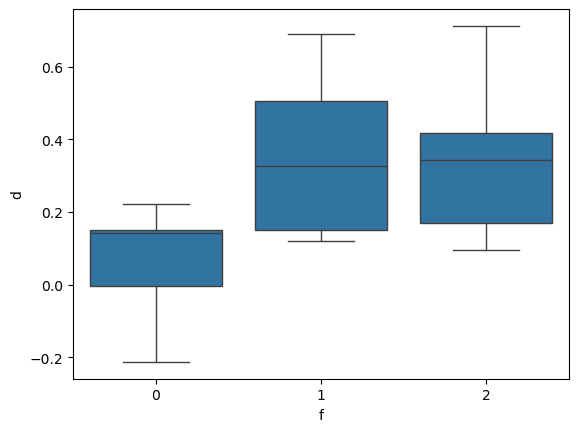

In [12]:
import seaborn as sns
sns.boxplot(x="f", y="d", data=df)